In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from time import time
import numpy as np
import sys
sys.path.append('../')
from utils.codification_NASBench import FitnessNASBench, ChromosomeNASBench
from utils.codification_cnn import FitnessCNN
from utils.datamanager import DataManager


Using TensorFlow backend.


In [ ]:
fitness_nasbench = FitnessNASBench('../nasbench/nasbench_full.tfrecord')

best_c = fitness_nasbench.best_nasbench

params, data = fitness_nasbench.get_params(best_c)


In [2]:


#ChromosomeNASBench.STEM_SIZE = 128

def get_best():
    best_m = np.array([[0, 1, 1, 0, 0, 1, 1],
                                [0, 0, 0, 1, 0, 0, 0],
                                [0, 0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 0, 1],
                                [0, 0, 0, 0, 0, 0, 0]], dtype=np.int32)
    best_op = ['input', 'conv3x3-bn-relu', 'conv1x1-bn-relu', 'maxpool3x3',
                         'conv3x3-bn-relu', 'conv3x3-bn-relu', 'output']
    best_c = ChromosomeNASBench(best_op, best_m)
    ChromosomeNASBench.STEM_SIZEEM_SIZE = 128
    ChromosomeNASBench.N_BLOCKS = 3
    ChromosomeNASBench.N_CELLS = 3
    return best_c

def get_resnet20():
    array = np.array([[0, 1, 0, 1],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 0]])
    ops = ['input', 'conv3x3-bn-relu', 'conv3x3-bn-relu', 'output']
    c = ChromosomeNASBench(ops, array)
    ChromosomeNASBench.STEM_SIZE = 16
    ChromosomeNASBench.N_BLOCKS = 3
    ChromosomeNASBench.N_CELLS = 3
    return c

In [3]:
fitness_cnn = FitnessCNN()
classes = []
data_folder = None

# Fitness params
epochs = 108
batch_size = 64
verbose = True
redu_plat = False
early_stop = 50
warm_up_epochs = 0
base_lr = 0.01
smooth = 0.1
cosine_dec = False
lr_find = False
precise_eps = 108

datasets = ['MB', 'MBI', 'MRB', 'MRD', 'MRDBI']
dataset = 'cifar10'

In [4]:
# Load data
dm = DataManager(dataset, clases=classes, folder_var_mnist=data_folder) # , max_examples=8000)
data = dm.load_data()
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps)

(40000, 32, 32, 3) train samples
(10000, 32, 32, 3) validation samples
(10000, 32, 32, 3) test samples


[[0 1 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
['input', 'conv3x3-bn-relu', 'conv3x3-bn-relu', 'output']
16 3
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 32, 32, 16)   0           batch_

Epoch 1/108
312/312 [==============================] - 55s 176ms/step - loss: 2.3647 - accuracy: 0.1155 - val_loss: 2.3426 - val_accuracy: 0.0955
Epoch 2/108
312/312 [==============================] - 31s 98ms/step - loss: 2.1582 - accuracy: 0.2074 - val_loss: 2.0681 - val_accuracy: 0.2175
Epoch 3/108
312/312 [==============================] - 31s 99ms/step - loss: 1.9556 - accuracy: 0.2991 - val_loss: 2.6848 - val_accuracy: 0.2076
Epoch 4/108
312/312 [==============================] - 31s 98ms/step - loss: 1.8055 - accuracy: 0.3842 - val_loss: 2.0976 - val_accuracy: 0.2627
Epoch 5/108
312/312 [==============================] - 31s 99ms/step - loss: 1.7064 - accuracy: 0.4359 - val_loss: 1.8686 - val_accuracy: 0.3726
Epoch 6/108
312/312 [==============================] - 31s 99ms/step - loss: 1.6304 - accuracy: 0.4726 - val_loss: 1.9005 - val_accuracy: 0.3700
Epoch 7/108
312/312 [==============================] - 31s 99ms/step - loss: 1.5538 - accuracy: 0.5148 - val_loss: 1.7003 - val_a

312/312 [==============================] - 30s 96ms/step - loss: 0.8276 - accuracy: 0.8605 - val_loss: 1.0416 - val_accuracy: 0.6861
Epoch 58/108
312/312 [==============================] - 30s 97ms/step - loss: 0.8218 - accuracy: 0.8639 - val_loss: 0.9071 - val_accuracy: 0.7209
Epoch 59/108
312/312 [==============================] - 30s 97ms/step - loss: 0.8107 - accuracy: 0.8687 - val_loss: 0.6619 - val_accuracy: 0.7931
Epoch 60/108
312/312 [==============================] - 30s 97ms/step - loss: 0.8080 - accuracy: 0.8686 - val_loss: 0.7588 - val_accuracy: 0.7684
Epoch 61/108
312/312 [==============================] - 30s 97ms/step - loss: 0.8006 - accuracy: 0.8711 - val_loss: 0.7084 - val_accuracy: 0.7816
Epoch 62/108
312/312 [==============================] - 30s 96ms/step - loss: 0.7951 - accuracy: 0.8746 - val_loss: 0.6634 - val_accuracy: 0.7931
Epoch 63/108
312/312 [==============================] - 30s 97ms/step - loss: 0.7876 - accuracy: 0.8788 - val_loss: 0.6311 - val_accuracy

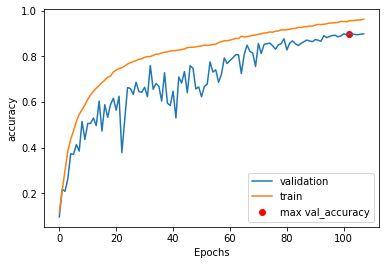

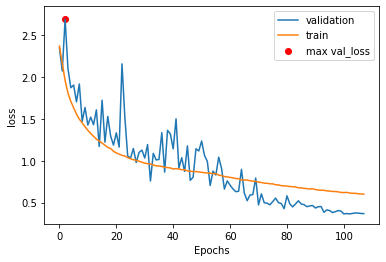

0.1055 in 57.5 min



0.1054999828338623

In [5]:
c = get_resnet20()
print(c)
print(c.STEM_SIZE, c.N_CELLS)

fitness_cnn.calc(c, test=True, augmnt=True)

[[0 1 1 0 0 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]
['input', 'conv3x3-bn-relu', 'conv1x1-bn-relu', 'maxpool3x3', 'conv3x3-bn-relu', 'conv3x3-bn-relu', 'output']
128 3
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_f16_1 (Batc (None, 32, 32, 128)  512         conv2d_1[0][0]                   
__________________________________________

Epoch 1/108
1250/1250 [==============================] - 222s 178ms/step - loss: 2.0359 - accuracy: 0.2659 - val_loss: 1.9628 - val_accuracy: 0.2964
Acc -> Val acc: 0.7036,Test (best_acc) acc: 0.7075


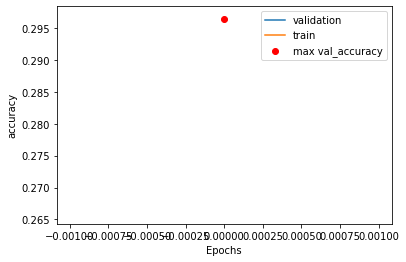

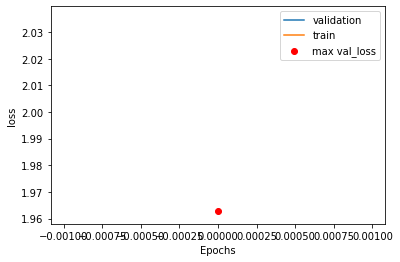

0.7075 in 8.8 min



0.70751953125

In [7]:
ChromosomeNASBench.STEM_SIZE = 128
c = get_best()
print(c)
print(c.STEM_SIZE, c.N_CELLS)
fitness_cnn.learning_rate_base = 0.01
fitness_cnn.early_stop = 100
fitness_cnn.batch_size = 32
fitness_cnn.calc(c, test=True, augmnt=True, fp=16)

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [ ]:
model.evaluate(data[1][0], data[1][1])